'''
 Project Tittle : Food Dilivery Time Prediction :-

Objective:The primary objective of the "Food Delivery Time" dataset is to develop a machine learning model that accurately predicts the time taken for food deliveries. By analyzing various factors such as delivery personnel characteristics, environmental conditions, and real-time variables like weather and traffic, the model aims to provide precise delivery time estimates. This can enhance customer satisfaction and optimize delivery
operations.
'''

In [102]:
#Problem Statement : 
'''
The task is to build a predictive model that estimates the total delivery time for food orders. The model should consider factors including:
Order details: type of food, restaurant, preparation time.
Market conditions: delivery demand, driver availability.
Traffic status: congestion, road closures.
By incorporating these variables, the model seeks to provide reliable delivery time predictions, thereby improving operational
efficiency and customer experience. 

'''
# Benefits
'''
Benefits:predictive modeling enhances the food delivery experience for customers through accurate deliverytimes and personalized
options, while enabling companies to operate more efficiently and align their offerings with customer needs.
'''
#Import all basic library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import  seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

import warnings 
warnings.filterwarnings("ignore")

##To Load DataSet

In [103]:

df= pd.read_csv("C:/Users/vishal/Downloads/Food_Time_Data_Set.csv")

#To Show first 5 records
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45


In [104]:
#To show all Details of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  object 
 1   Delivery_person_ID           10000 non-null  object 
 2   Delivery_person_Age          10000 non-null  float64
 3   Delivery_person_Ratings      10000 non-null  float64
 4   Restaurant_latitude          10000 non-null  float64
 5   Restaurant_longitude         10000 non-null  float64
 6   Delivery_location_latitude   10000 non-null  float64
 7   Delivery_location_longitude  10000 non-null  float64
 8   Type_of_order                10000 non-null  object 
 9   Type_of_vehicle              10000 non-null  object 
 10  temperature                  9995 non-null   float64
 11  humidity                     9995 non-null   float64
 12  precipitation                9995 non-null   float64
 13  weather_descript

In [105]:
# shape of Dateset ,How Many rows and columns
df.shape

(10001, 18)

In [106]:
# Show the all columns name
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Unnamed: 14', 'Traffic_Level', 'Distance (km)', 'TARGET'],
      dtype='object')

In [107]:
# the 100%  columns is nall values we  will drop the columns
df["Unnamed: 14"].isnull().sum()/df.shape[0]*100

100.0

In [108]:
# droping the Unnamed :14 columns because in the this columns 100% entry in null 
df.drop(["Unnamed: 14"],axis=1,inplace=True)
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.89,43.45


<Axes: >

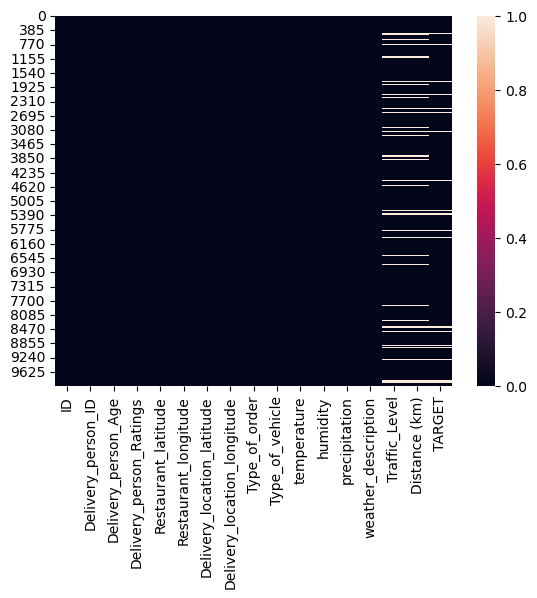

In [109]:
# checking the null values using the heatmap() 
sns.heatmap(data=df.isnull())

In [110]:
#To show the data types of each columns
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
temperature                    float64
humidity                       float64
precipitation                  float64
weather_description             object
Traffic_Level                   object
Distance (km)                  float64
TARGET                          object
dtype: object

In [111]:
#Replace Null values : -
#using the for loop and replacing the numerical columns  values in using median  and  catgorical columns by mode
numerical_cols = df.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [112]:
#check null vaalues 
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
temperature                    0
humidity                       0
precipitation                  0
weather_description            0
Traffic_Level                  0
Distance (km)                  0
TARGET                         0
dtype: int64

In [113]:
#replace #VALUE! with mm
mm=43.33
df["TARGET"].replace('#VALUE!',mm,inplace=True)


In [114]:
#change the datatype of TARGET column from object to float
df["TARGET"]=df["TARGET"].astype(float)
df.dtypes


ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
temperature                    float64
humidity                       float64
precipitation                  float64
weather_description             object
Traffic_Level                   object
Distance (km)                  float64
TARGET                         float64
dtype: object

In [115]:
#To check datatypes of each column in given dataset
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
temperature                    float64
humidity                       float64
precipitation                  float64
weather_description             object
Traffic_Level                   object
Distance (km)                  float64
TARGET                         float64
dtype: object

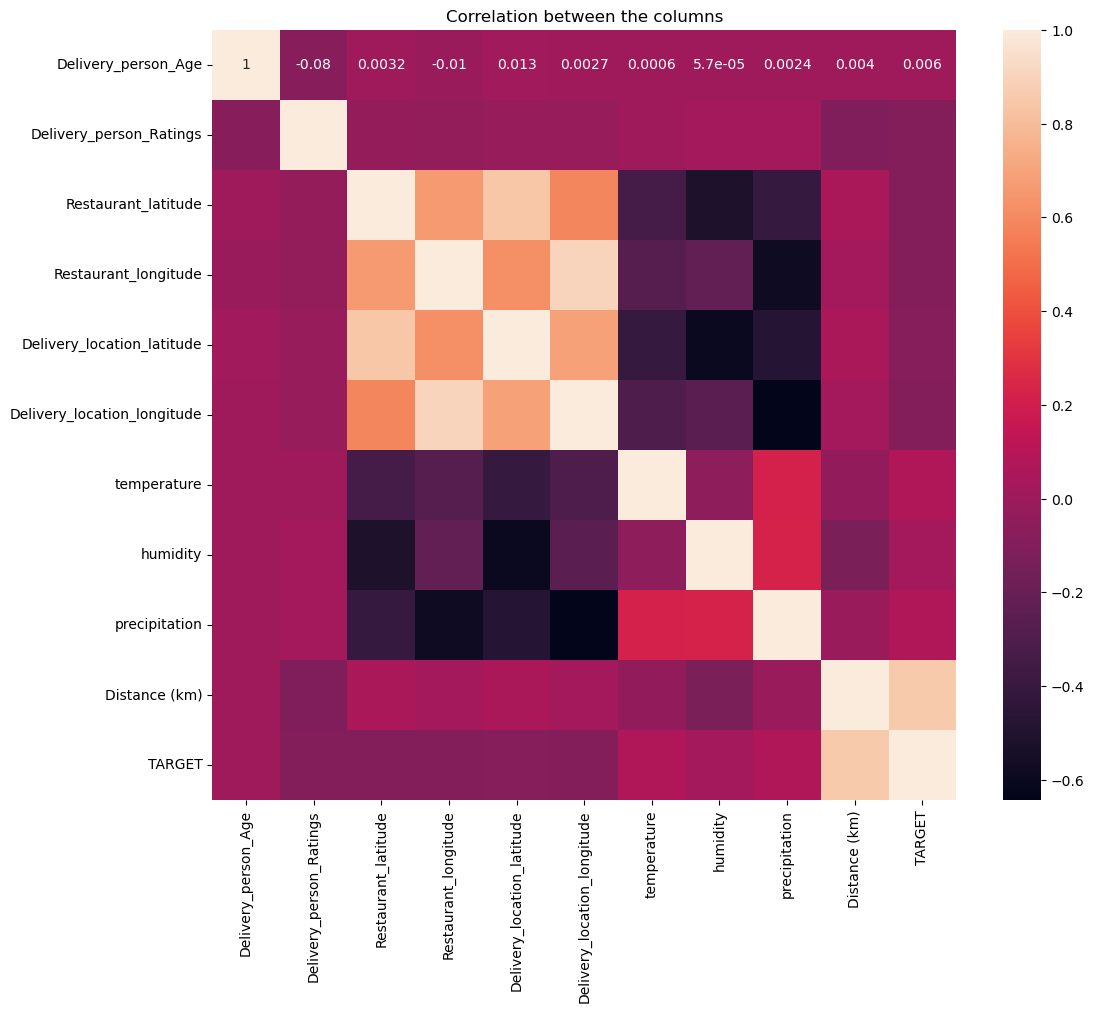

In [116]:
# checking the correlation between the columns
num_df=df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
plt.title("Correlation between the columns")
sns.heatmap(num_df.corr() ,annot=True)
plt.show()

In [117]:
num_df.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET
Delivery_person_Age,1.000000,-0.080000,0.003197,-0.010030,0.013250,0.002665,0.000601,0.000057,0.002383,0.004037,0.006035
Delivery_person_Ratings,-0.080000,1.000000,-0.029878,-0.037772,-0.023595,-0.025019,0.000769,0.022168,0.030816,-0.112288,-0.091076
Restaurant_latitude,0.003197,-0.029878,1.000000,0.660487,0.842278,0.587937,-0.347063,-0.515750,-0.409906,0.051457,-0.095557
Restaurant_longitude,-0.010030,-0.037772,0.660487,1.000000,0.616936,0.903097,-0.274910,-0.228413,-0.580229,0.027248,-0.092979
Delivery_location_latitude,0.013250,-0.023595,0.842278,0.616936,1.000000,0.689675,-0.408211,-0.603911,-0.477860,0.056578,-0.084604
Delivery_location_longitude,0.002665,-0.025019,0.587937,0.903097,0.689675,1.000000,-0.308557,-0.254370,-0.642463,0.028340,-0.090804
temperature,0.000601,0.000769,-0.347063,-0.274910,-0.408211,-0.308557,1.000000,-0.052382,0.219727,-0.039592,0.075761
humidity,0.000057,0.022168,-0.515750,-0.228413,-0.603911,-0.254370,-0.052382,1.000000,0.226585,-0.124093,0.018667
precipitation,0.002383,0.030816,-0.409906,-0.580229,-0.477860,-0.642463,0.219727,0.226585,1.000000,-0.012266,0.070745
Distance (km),0.004037,-0.112288,0.051457,0.027248,0.056578,0.028340,-0.039592,-0.124093,-0.012266,1.000000,0.858274


<Figure size 1500x1000 with 0 Axes>

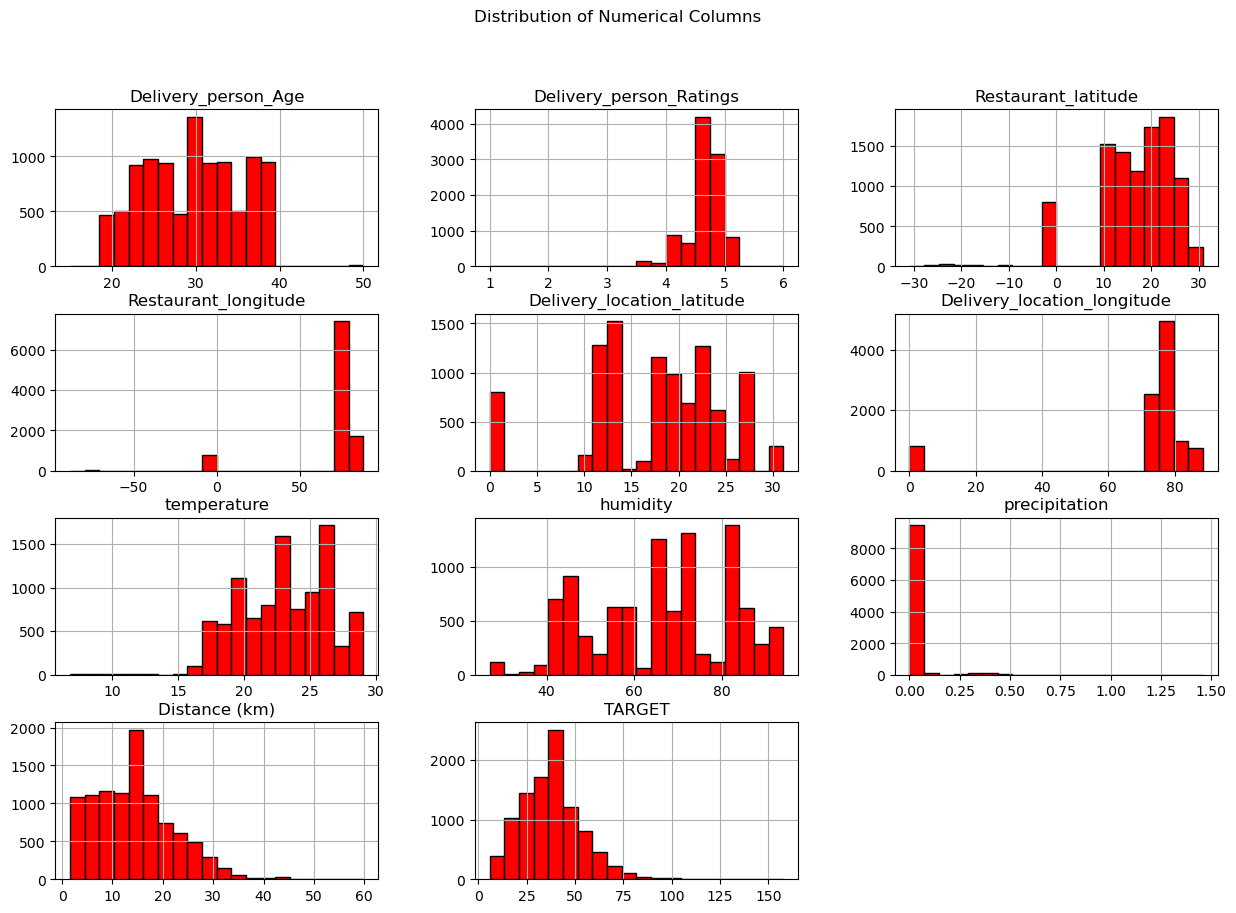

In [118]:
plt.figure(figsize=(15, 10))
df.select_dtypes(include=['float64']).hist(bins=20, figsize=(15, 10), color='red', edgecolor='black')
plt.suptitle("Distribution of Numerical Columns")
plt.show()

In [119]:
#check outlier 
q1=df["TARGET"].quantile(0.25) # first quentile
q3=df["TARGET"].quantile(0.75) # thired quentile
 # find theinter queyttile range  
IQR=q3-q1
# find the lower wisker
Lw=q1-1.5*IQR
 # find the upper wisker
Uw=q3-1.5*IQR
print("first quentile q1:",q1)
print("thired quemntile q3:",q3)
print("lower wisker Lw:",Lw)
print("Upper wisker:",Uw)
print("Interquertile range:",IQR)

first quentile q1: 26.78333333
thired quemntile q3: 46.26666667
lower wisker Lw: -2.4416666799999938
Upper wisker: 17.041666660000004
Interquertile range: 19.483333339999998


{'whiskers': [<matplotlib.lines.Line2D at 0x25dfa8f2e10>,
 'caps': [<matplotlib.lines.Line2D at 0x25dfca6fe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x25dfa8f3b90>],
 'medians': [<matplotlib.lines.Line2D at 0x25dfca6cf90>],
 'fliers': [<matplotlib.lines.Line2D at 0x25dfca6e190>],
 'means': []}

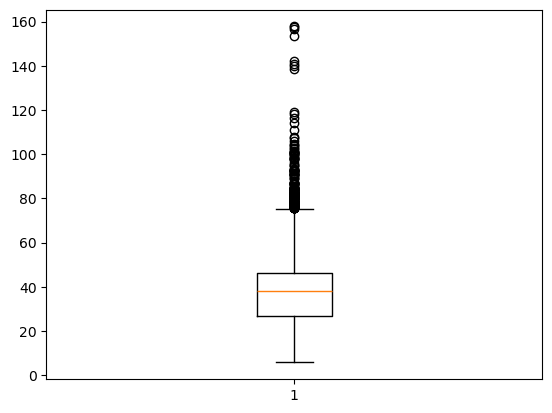

In [120]:
#check outlier with the help of  BOXPLOT
plt.boxplot(data=df,x="TARGET")

In [121]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Traffic_Level', 'Distance (km)', 'TARGET'],
      dtype='object')

<Axes: xlabel='Delivery_location_latitude'>

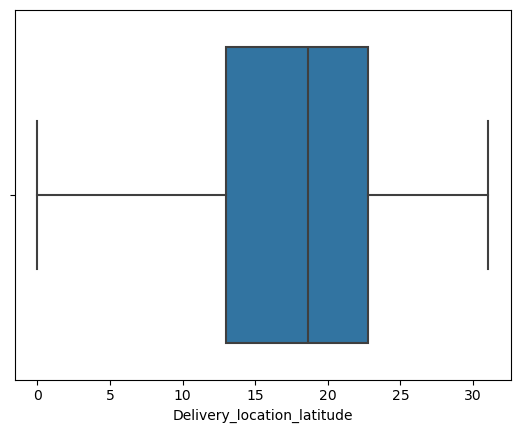

In [122]:
sns.boxplot(data=df,x="Delivery_location_latitude")

In [123]:
q1=df["Delivery_location_latitude"].quantile(0.25) # first quentile
q3=df["Delivery_location_latitude"].quantile(0.75) # thired quentile
 # find theinter queyttile range  
IQR=q3-q1
# find the lower wisker
Lw=q1-1.5*IQR
 # find the upper wisker
Uw=q3-1.5*IQR
print("first quentile q1:",q1)
print("thired quemntile q3:",q3)
print("lower wisker Lw:",Lw)
print("Upper wisker:",Uw)
print("Interquertile range:",IQR)

first quentile q1: 12.984179
thired quemntile q3: 22.785049
lower wisker Lw: -1.7171260000000022
Upper wisker: 8.083744
Interquertile range: 9.800870000000002


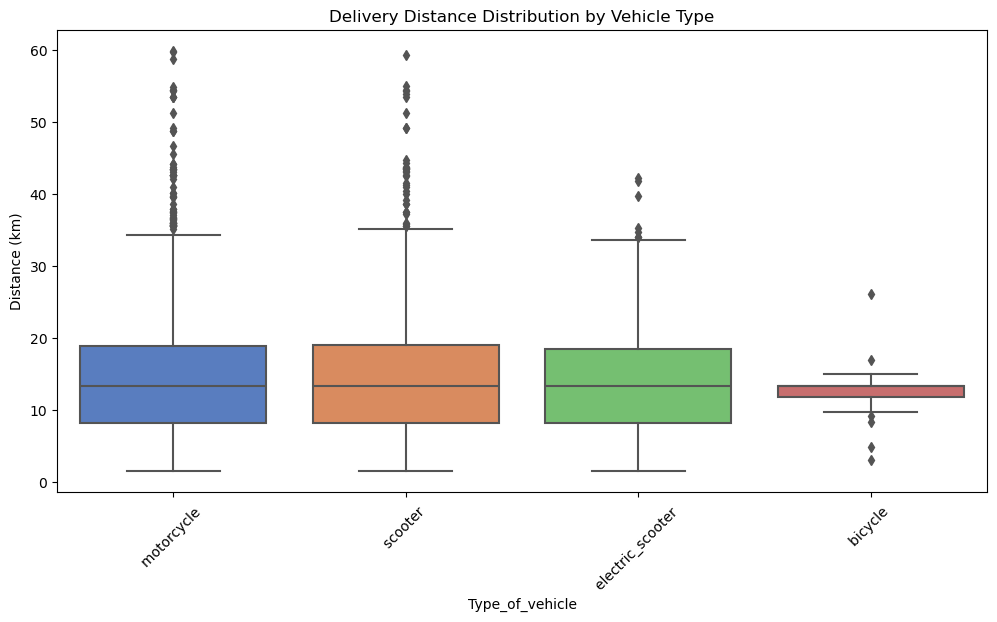

In [124]:
#Delivery Distance Distribution by Vehicle Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type_of_vehicle', y='Distance (km)', palette='muted')
plt.title("Delivery Distance Distribution by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

In [125]:
#he ID and Delivery_person_ID columns are generally not important for building a machine learning model, as they serve merely
#as unique identifiers and do not provide valuable information for prediction.
#Including them can lead to overfitting, where the model learns to rely on these identifiers rather than the actual features that influence delivery outcomes
df.drop(["ID","Delivery_person_ID"],axis=1,inplace=True)
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,Low,13.40,21.666667
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.17,85.266667
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.34,28.583333
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.05,35.183333
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.89,43.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,0.0,haze,High,18.92,32.616667
9997,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,0.0,haze,Low,2.64,12.016667
9998,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,0.0,clear sky,Very High,28.80,51.066667
9999,29.0,4.7,18.994237,72.825553,19.084237,72.915553,Meal,scooter,28.01,57.0,0.0,smoke,High,17.63,43.800000


In [126]:
# in the given datset there is not an outlier
# now we use the label encoder to convert the  categorical columns into the numerical data
df.dtypes

Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
temperature                    float64
humidity                       float64
precipitation                  float64
weather_description             object
Traffic_Level                   object
Distance (km)                  float64
TARGET                         float64
dtype: object

In [127]:
#separate the numeric column and object column and hold in new dataframe num_df and cat_df
num_df=df.select_dtypes("float64")
cat_df=df.select_dtypes(["object"])

In [128]:
# checking the object columns in cat_df 
cat_df.dtypes

Type_of_order          object
Type_of_vehicle        object
weather_description    object
Traffic_Level          object
dtype: object

In [129]:
# uning the for loop to convert object type data to number
for col in cat_df:
   le=LabelEncoder()
   cat_df[col]=le.fit_transform(cat_df[col])


In [130]:
cat_df.dtypes

Type_of_order          int32
Type_of_vehicle        int32
weather_description    int32
Traffic_Level          int32
dtype: object

In [131]:
#to merge both dataframe cat_df and num_df and hold in new dataframe df_new
df_new=pd.concat([cat_df,num_df],axis=1)
df_new

,Type_of_order,Type_of_vehicle,weather_description,Traffic_Level,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET
0,3,2,4,1,37.0,4.9,22.745049,75.892471,22.765049,75.912471,17.11,77.0,0.0,13.40,21.666667
1,3,3,6,3,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19.50,93.0,0.0,37.17,85.266667
2,1,2,6,1,23.0,4.4,12.914264,77.678400,12.924264,77.688400,20.45,91.0,0.0,3.34,28.583333
3,0,2,6,2,38.0,4.7,11.003669,76.976494,11.053669,77.026494,23.86,78.0,0.0,10.05,35.183333
4,3,3,6,0,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26.55,87.0,0.0,9.89,43.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,2,4,0,32.0,4.2,22.310237,73.158921,22.400237,73.248921,23.96,64.0,0.0,18.92,32.616667
9997,2,2,4,1,36.0,4.7,17.483216,78.552111,17.493216,78.562111,22.94,60.0,0.0,2.64,12.016667
9998,0,3,1,3,37.0,4.6,26.913987,75.752891,27.053987,75.892891,23.72,31.0,0.0,28.80,51.066667
9999,2,3,10,0,29.0,4.7,18.994237,72.825553,19.084237,72.915553,28.01,57.0,0.0,17.63,43.800000


In [132]:
#select the input and output from df_new dataframe
x=df_new.drop(["TARGET"],axis=1) #input
y=df_new["TARGET"] #output

In [133]:
#train test split 70%-30%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [134]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 14), (3001, 14), (7000,), (3001,))

In [135]:
x_train.head()

,Type_of_order,Type_of_vehicle,weather_description,Traffic_Level,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km)
9689,3,2,5,0,38.0,4.5,0.000000,0.000000,0.050000,0.050000,26.35,82.0,0.29,13.40
1950,2,2,1,3,30.0,4.3,23.232537,77.429845,23.362537,77.559845,18.45,58.0,0.00,31.39
2119,3,3,5,0,27.0,5.0,0.000000,0.000000,0.030000,0.030000,26.28,85.0,0.10,13.40
3906,0,3,4,2,30.0,4.5,22.745049,75.892471,22.795049,75.942471,17.14,72.0,0.00,11.78
1664,3,1,1,1,24.0,4.8,18.536718,73.830327,18.556718,73.850327,19.25,65.0,0.00,5.55


In [136]:
#Apply Feature scaling on training input and testing input : standarization
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [137]:
#Perform the model with the help of Linear Regression
#create the object of LinearRegression class
lr=LinearRegression()


In [138]:
#Train the model  with 70% data X_train and Y_train
lr.fit(x_train,y_train)

LinearRegression()

In [139]:
dict={'Input Columns':x.columns,'Slope':lr.coef_}
df1=pd.DataFrame(dict)
df1

,Input Columns,Slope
0,Type_of_order,-0.331095
1,Type_of_vehicle,-0.004559
2,weather_description,1.530582
3,Traffic_Level,0.782256
4,Delivery_person_Age,0.048482
5,Delivery_person_Ratings,0.020930
6,Restaurant_latitude,-1.600493
7,Restaurant_longitude,-0.059194
8,Delivery_location_latitude,1.820679
9,Delivery_location_longitude,-1.669693


In [140]:
#Check model is underfit or overfit
#first find score of training , use score()
train_score=lr.score(x_train,y_train)
print("training score : ",train_score)

training score :  0.7779500106145829


In [141]:
#first find score of testing , use score() inbuilt method of LinearRegression class
test_score=lr.score(x_test,y_test)
print("testing score : ",test_score)

testing score :  0.7863854041868142


In [142]:
#here training score < testing score Therfore the model is underfit ,
#To reduce the underfit of model , incresae the degree of Input features means use Polynomial liner regression

In [143]:
# to Test the model with 30% input X_test
y_pred=lr.predict(x_test)
y_pred

array([42.09321184, 54.94728067, 39.14519652, ..., 36.55977999,
       36.93360075, 48.54683686])

In [144]:
# checking the model  predicted output  and Actual Output
dict={'Actual Output':y_test,"Predicted Output": y_pred}
df1=pd.DataFrame(dict)
df1

,Actual Output,Predicted Output
9954,41.666667,42.093212
3851,71.100000,54.947281
4963,35.416667,39.145197
7918,41.516667,54.842494
9382,54.800000,58.091922
...,...,...
6275,29.216667,39.843004
6568,16.200000,17.438423
3755,35.483333,36.559780
5950,40.066667,36.933601


In [145]:
# Rss mean residual  sum of squared error
# Rss mean residual  sum of squared error

In [146]:
# implementing the Polynomial features  t to  the model
# $ means degree =2
# create the object of Polynomial features
ploy=PolynomialFeatures(2)# 2 means degree of input


In [147]:
x_ploy=ploy.fit_transform(x)


In [148]:
type(x_ploy),type(x)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [149]:
x_ploy.shape[0],x.shape[0]

(10001, 10001)

In [150]:
# we train_test_split the new x_poly
x_train,x_test,y_train,y_test=train_test_split(x_ploy,y,test_size=0.3,random_state=1)

In [151]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 120), (3001, 120), (7000,), (3001,))

In [152]:
#Again perform the model with linear regression after increase the degree of input features
lr1=LinearRegression()

#train the model
lr1.fit(x_train,y_train)

LinearRegression()

In [153]:
#test the model 
y_pred1=lr1.predict(x_test)
y_pred1

array([41.47883469, 63.50559051, 37.78014116, ..., 44.94940912,
       40.79973332, 48.57267394])

In [154]:
dict={"predict":y_pred1,"actual":y_test}
ac=pd.DataFrame(dict)
ac

,predict,actual
9954,41.478835,41.666667
3851,63.505591,71.100000
4963,37.780141,35.416667
7918,43.520514,41.516667
9382,54.884280,54.800000
...,...,...
6275,37.127211,29.216667
6568,17.022139,16.200000
3755,44.949409,35.483333
5950,40.799733,40.066667


In [155]:
# checking the mean squared error in our model 
#Evaluation of model
mseee=mean_squared_error(y_test,y_pred1)
mseee

37.13234124381472

In [156]:
#check test score
test_score1=r2_score(y_test,y_pred1)
test_score1

0.851800181762079

In [157]:
# checking the score of model after the using  Polynomial features
score=lr1.score(x_train,y_train)
print("training score",score)
score11=lr1.score(x_test,y_test)
print("testing score",score11)

training score 0.8603771939845634
testing score 0.851800181762079


In [158]:
#Here model is no underfit and no overfit
#final score 0.85 means 85%

#find the r2_score 
r2_score(y_test,y_pred1)
    

0.851800181762079

In [159]:
#mse
#mae =\Y-Y_p\+
#rss